In [1]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from sklearn import metrics

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

engine.dispose()

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)
heartdisease_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [3]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [4]:
scaler=StandardScaler()
X_std= scaler.fit_transform(X)

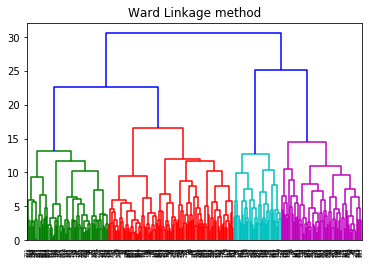

In [5]:
dendrogram(linkage(X_std, method='ward'))
plt.title('Ward Linkage method')
plt.show()

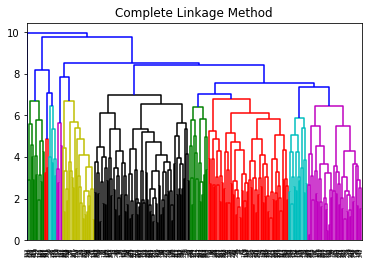

In [6]:
dendrogram(linkage(X_std, method='complete'))
plt.title('Complete Linkage Method')
plt.show()

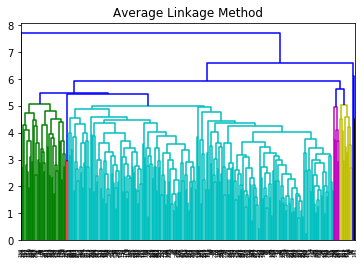

In [7]:
dendrogram(linkage(X_std, method='average'))
plt.title('Average Linkage Method')
plt.show()

Without tuning, the Ward method seems the most reasonable, while the average method produced the least similar clusters. 

In [8]:
ward_cluster=AgglomerativeClustering(linkage='ward', 
                                    affinity='euclidean', 
                                    n_clusters=2)
wards=ward_cluster.fit_predict(X_std)

In [9]:
av_cluster=AgglomerativeClustering(linkage='average', 
                                    affinity='cosine', 
                                    n_clusters=2)
averages=av_cluster.fit_predict(X_std)

In [10]:
complete_cluster=AgglomerativeClustering(linkage='complete', 
                                    affinity='manhattan', 
                                    n_clusters=2)
completes= complete_cluster.fit_predict(X_std)

In [11]:
print('Ward ARI Score: {0:.3f}'.format(metrics.adjusted_rand_score(y, wards)))
print('Ward silhouette Score: {0:.3f}'.format(metrics.silhouette_score(X_std, wards)))

Ward ARI Score: 0.146
Ward silhouette Score: 0.139


In [12]:
print('Average ARI Score: {0:.3f}'.format(metrics.adjusted_rand_score(y, averages)))
print('Average silhouette Score: {0:.3f}'.format(metrics.silhouette_score(X_std, averages, metric='cosine')))

Average ARI Score: 0.294
Average silhouette Score: 0.233


In [13]:
print('Complete ARI Score: {0:.3f}'.format(metrics.adjusted_rand_score(y, completes)))
print('Complete silhouette Score: {0:.3f}'.format(metrics.silhouette_score(X_std, completes, metric='cosine')))

Complete ARI Score: 0.371
Complete silhouette Score: 0.230


The Average linkage method produced the highest scores by both metrics. The kmeans=2 solution from the previous checkpoint yielded an ARI score of 0.43 and silhouette score of 0.17, so the kmeans solution would be the best option in this case if ground truths are known, but the average linkage method through agg_clusters are better for unsupervised approaches.